# Identificação de Perfis de Estudantes com Modelos Descritivos

## Parte 1: Conteúdo Teórico Explicativo

Este notebook tem como objetivo demonstrar a identificação de perfis de estudantes com base em dados educacionais,
utilizando modelos descritivos e técnicas de agrupamento (clustering).

Pontos-chave:
- Modelos descritivos ajudam a resumir, explorar e visualizar dados.
- No contexto educacional, podemos usar esses modelos para identificar perfis de engajamento e desempenho.
- O clustering é uma técnica não supervisionada que agrupa instâncias semelhantes entre si.

Técnicas usadas neste notebook:
- Estatística descritiva (média, desvio padrão)
- Visualização de dados (gráficos)
- K-means clustering


## Parte 2: Exemplo Prático

## Importação de Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

## Carregamento do Dataset Exemplo

O dataset simulado contém dados de estudantes com as seguintes colunas:
- 'id': identificador do estudante
- 'acessos': número de acessos ao AVA
- 'participacoes': número de interações em fóruns
- 'entregas': percentual de tarefas entregues
- 'nota_final': nota final no curso

In [2]:
# Dataset simulado

data = {
    'id': range(1, 21),
    'acessos': [25, 10, 5, 40, 35, 20, 15, 8, 50, 30, 45, 12, 18, 22, 28, 6, 4, 38, 44, 7],
    'participacoes': [12, 4, 2, 18, 16, 8, 5, 2, 20, 14, 19, 3, 6, 10, 11, 1, 0, 17, 18, 2],
    'entregas': [0.9, 0.6, 0.4, 1.0, 0.95, 0.8, 0.7, 0.5, 1.0, 0.85, 1.0, 0.55, 0.65, 0.75, 0.8, 0.3, 0.2, 0.9, 1.0, 0.4],
    'nota_final': [8.5, 6.0, 4.5, 9.5, 9.0, 7.5, 6.5, 5.0, 10.0, 8.0, 9.5, 5.5, 6.0, 7.0, 7.5, 3.5, 2.0, 8.5, 9.5, 4.0]
}
df = pd.DataFrame(data)
df.head()

,id,acessos,participacoes,entregas,nota_final
0,1,25,12,0.90,8.5
1,2,10,4,0.60,6.0
2,3,5,2,0.40,4.5
3,4,40,18,1.00,9.5
4,5,35,16,0.95,9.0


### Estatística Descritiva

In [3]:
print("\nEstatísticas Descritivas:")
print(df.describe())


Estatísticas Descritivas:
             id    acessos  participacoes   entregas  nota_final
count  20.00000  20.000000      20.000000  20.000000   20.000000
mean   10.50000  23.100000       9.400000   0.712500    6.875000
std     5.91608  14.927544       6.923644   0.252292    2.276164
min     1.00000   4.000000       0.000000   0.200000    2.000000
25%     5.75000   9.500000       2.750000   0.537500    5.375000
50%    10.50000  21.000000       9.000000   0.775000    7.250000
75%    15.25000  35.750000      16.250000   0.912500    8.625000
max    20.00000  50.000000      20.000000   1.000000   10.000000


### Visualização Inicial dos Dados

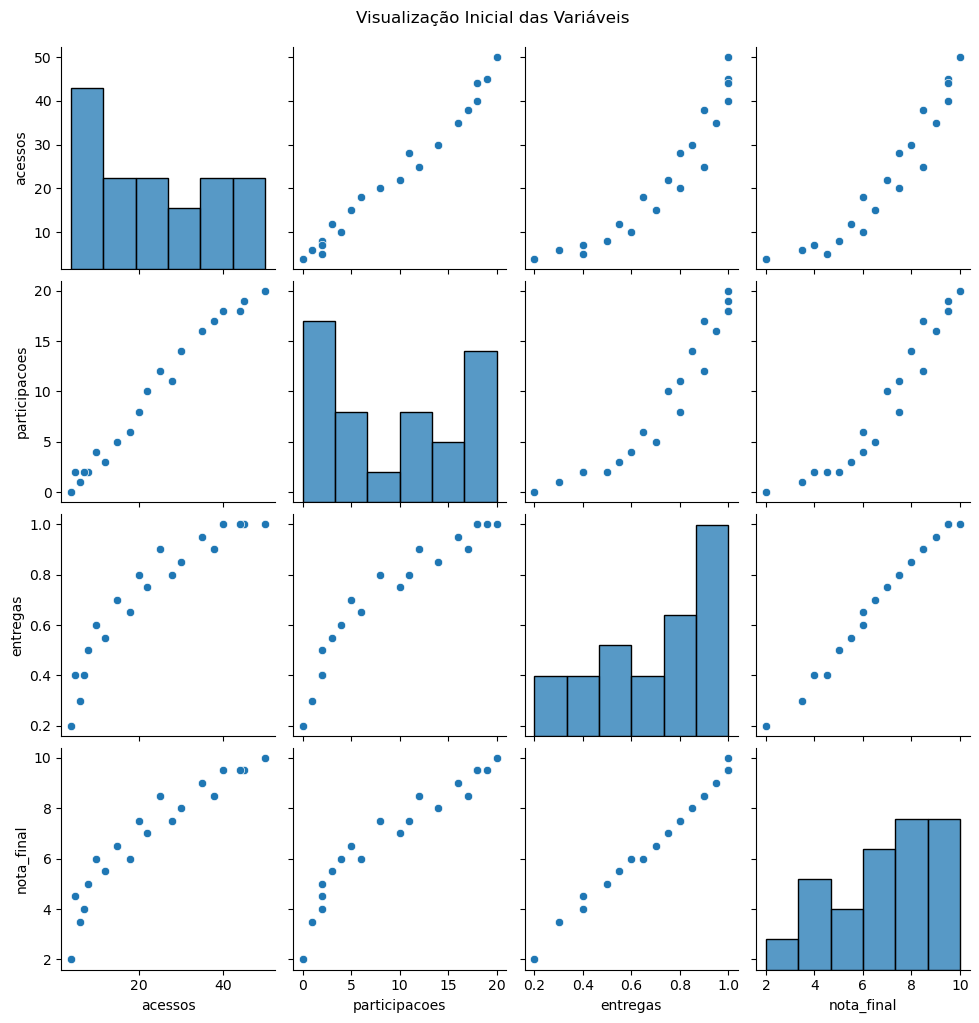

In [4]:
sns.pairplot(df.drop('id', axis=1))
plt.suptitle('Visualização Inicial das Variáveis', y=1.02)
plt.show()

### Normalização dos Dados

In [5]:
features = ['acessos', 'participacoes', 'entregas', 'nota_final']
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features])

### Determinação do Melhor Número de Clusters com Silhouette

In [6]:
range_n_clusters = range(2, 10)
best_n = 2
best_score = -1

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(df_scaled)
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    print(f"Para n_clusters = {n_clusters}, o coeficiente de silhouette é {silhouette_avg:.4f}")
    if silhouette_avg > best_score:
        best_n = n_clusters
        best_score = silhouette_avg

print(f"\nMelhor número de clusters com base no silhouette: {best_n}")

Para n_clusters = 2, o coeficiente de silhouette é 0.5704
Para n_clusters = 3, o coeficiente de silhouette é 0.5292
Para n_clusters = 4, o coeficiente de silhouette é 0.4198
Para n_clusters = 5, o coeficiente de silhouette é 0.3869
Para n_clusters = 6, o coeficiente de silhouette é 0.3555
Para n_clusters = 7, o coeficiente de silhouette é 0.3754
Para n_clusters = 8, o coeficiente de silhouette é 0.2681
Para n_clusters = 9, o coeficiente de silhouette é 0.2372

Melhor número de clusters com base no silhouette: 2


### Aplicando KMeans com o melhor número de clusters

In [7]:
kmeans = KMeans(n_clusters=best_n, random_state=42)
df['cluster'] = kmeans.fit_predict(df_scaled)

In [8]:
df

,id,acessos,participacoes,entregas,nota_final,cluster
0,1,25,12,0.90,8.5,1
1,2,10,4,0.60,6.0,0
2,3,5,2,0.40,4.5,0
3,4,40,18,1.00,9.5,1
4,5,35,16,0.95,9.0,1
5,6,20,8,0.80,7.5,0
6,7,15,5,0.70,6.5,0
7,8,8,2,0.50,5.0,0
8,9,50,20,1.00,10.0,1
9,10,30,14,0.85,8.0,1


### Analise os grupos 0 e 1 e informe as característica de cada grupo.

In [20]:
df

,id,acessos,participacoes,entregas,nota_final,cluster
0,1,25,12,0.90,8.5,1
1,2,10,4,0.60,6.0,0
2,3,5,2,0.40,4.5,0
3,4,40,18,1.00,9.5,1
4,5,35,16,0.95,9.0,1
5,6,20,8,0.80,7.5,0
6,7,15,5,0.70,6.5,0
7,8,8,2,0.50,5.0,0
8,9,50,20,1.00,10.0,1
9,10,30,14,0.85,8.0,1


In [23]:
summary = {}

Labels = ['acessos', 'participacoes', 'entregas', 'nota_final']

for label in Labels:
    for index in range(2):
        summary[index] = df[df[label] == index].describe().T  # .describe method provides general statistics about the data

In [24]:
summary[0]

,count,mean,std,min,25%,50%,75%,max
id,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
acessos,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
participacoes,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
entregas,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nota_final,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cluster,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


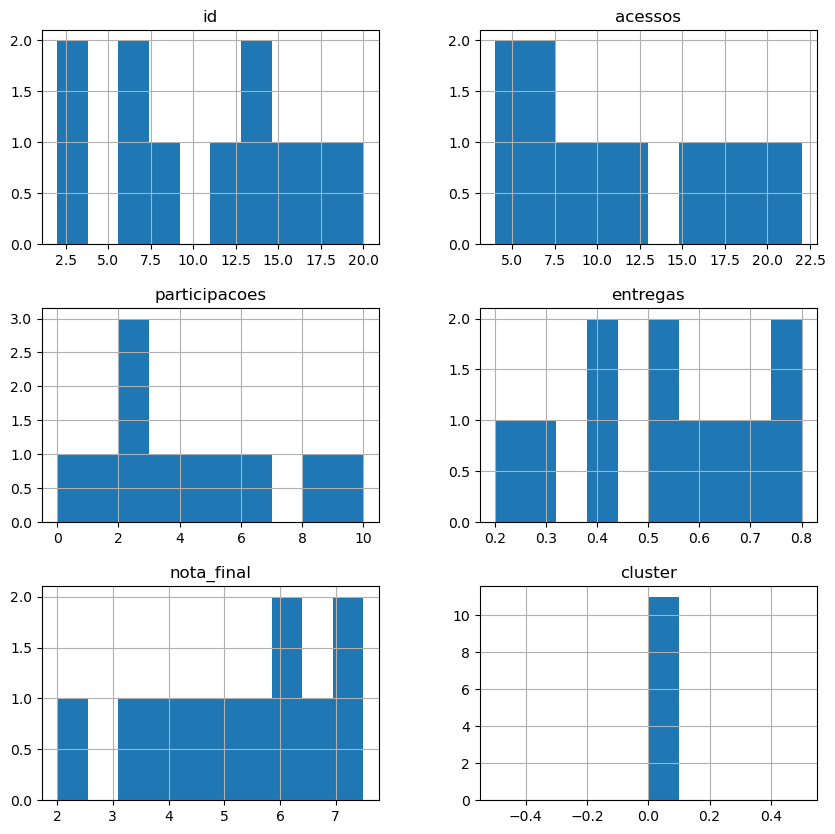

In [18]:
# GRUPO 0: Coloque seu código aqui...

df[df['cluster'] == 0].hist(figsize=(10,10));


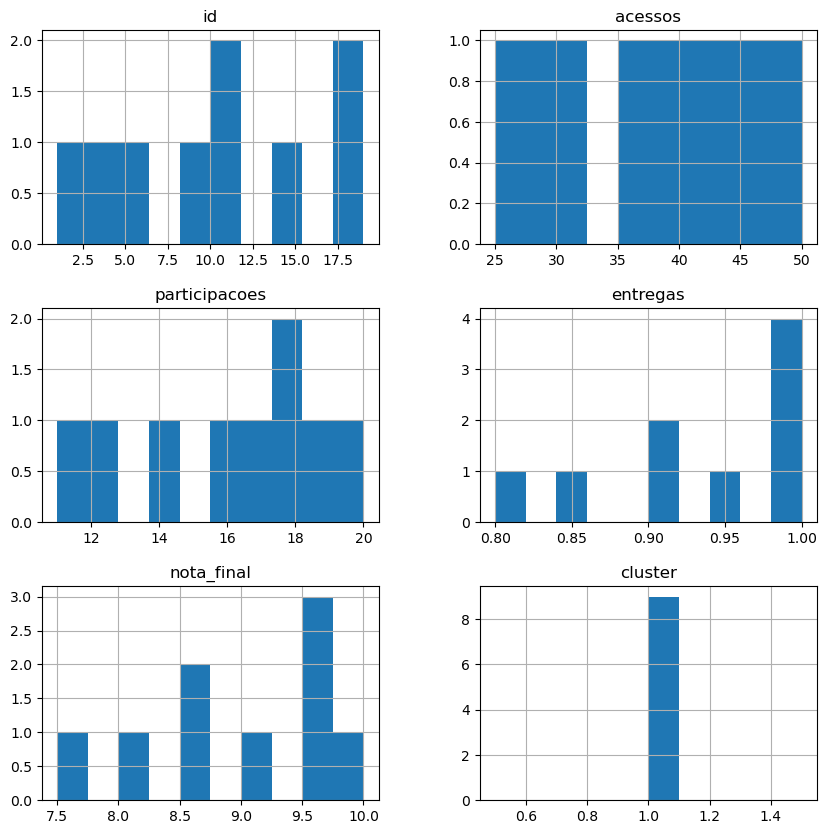

In [14]:
# GRUPO 1: Coloque seu código aqui...
df[df['cluster'] == 1].hist(figsize=(10,10));


### Visualização dos Clusters com PCA

In [11]:
df_pca

NameError: name 'df_pca' is not defined

In [ ]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)
df['pca1'] = df_pca[:, 0]
df['pca2'] = df_pca[:, 1]

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='pca1', y='pca2', hue='cluster', palette='Set2', s=100)
plt.title('Visualização dos Clusters com PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [ ]:
# Parte 9: Interpretação dos Perfis
print("\nMédias por cluster:")
print(df.groupby('cluster')[features].mean().round(2))
